In [1]:
# My system trained with tensorflow code

import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [2]:
def load(dire):
    qy = np.load(dire+'/qy.npy')
    yp = np.load(dire+'/y_pred.npy')
    z = np.load(dire+'/z.npy')
    return qy, yp, z

def F2d_fixedrange(proj, n):
    # projection of PC1 and PC2
    pc1 = proj[:,0]
    pc2 = proj[:,1]
    if len(pc1) == len(pc2):
        length = len(pc1)
    else:
        print('length not equal')
        return 0
    
    pc1_min = pc1.min()
    pc1_max = pc1.max()
        
    
    pc2_min = pc2.min()
    pc2_max = pc2.max()

    dmin = min(pc1_max - pc1_min, pc2_max - pc2_min)
    dx = dmin / n

    x = np.arange(pc1_min, pc1_max, dx)
    y = np.arange(pc2_min, pc2_max, dx)
    
    density_matrix = np.zeros(shape = (len(y), len(x)))
    for i in range(length):
        index1 = int((pc1[i] - pc1_min) / dx)
        index2 = int((pc2[i] - pc2_min) / dx)
        if (index2 >= 0) and (index1 >= 0):
            try:
                density_matrix[index2, index1] += 1
            except:
                pass

    return density_matrix, pc1_min, pc1_max, pc2_min, pc2_max, dx

# f2d is the free energy landscape
def plot_F_fixedrange(proj, title, n1 = 25, n2 = 10):
    f2d, pc1_min, pc1_max, pc2_min, pc2_max, dx = F2d_fixedrange(proj, n1)

    x = np.arange(pc1_min, pc1_max, dx)
    y = np.arange(pc2_min, pc2_max, dx)
    X, Y = np.meshgrid(x, y)
    params={ 'font.size': 24}
    plt.rcParams.update(params)
    plt.figure(figsize=(10, 8))
    ax = plt.axes()
    ax.set_facecolor('Silver')
    plt.contourf(X, Y, f2d, levels = np.linspace(1, f2d.max() + 1, n2))


    plt.colorbar(label = 'density')
    #plt.contour(X, Y, f2d, levels = np.arange(1, f2d.max() + 1, number), colors = ('k'), linewidths = 1)

    plt.xlabel(r'$z_1$')
    plt.ylabel(r'$z_2$')
    plt.title(title, fontsize = 24)
    #plt.show()
    params={ 'font.size': 18}
    plt.rcParams.update(params)
    return 0

def plot_classes(data, y_pred, k=5): 
    matplotlib.rcParams.update({'font.size': 20})
    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8, 6))
    sc = axes.scatter(data[:,0], data[:,1], c=y_pred, alpha=1, 
                    cmap=plt.cm.get_cmap('jet', k), s=1)
    cbar = fig.colorbar(sc, ax=axes)
    cbar.set_alpha(1)
    cbar.set_ticks(np.arange(0, 5, 1))
    cbar.set_label('Cluster index', labelpad=20)
    sc.set_alpha(1)
    sc.set_clim(-0.5, k - 0.5)
    cbar.draw_all()

    axes.set_xlabel(r'$z_1$')
    axes.set_ylabel(r'$z_2$')






In [3]:
qy1, yp1, z1 = load('cpumodel_5_2_2000_0.95_5000')

0

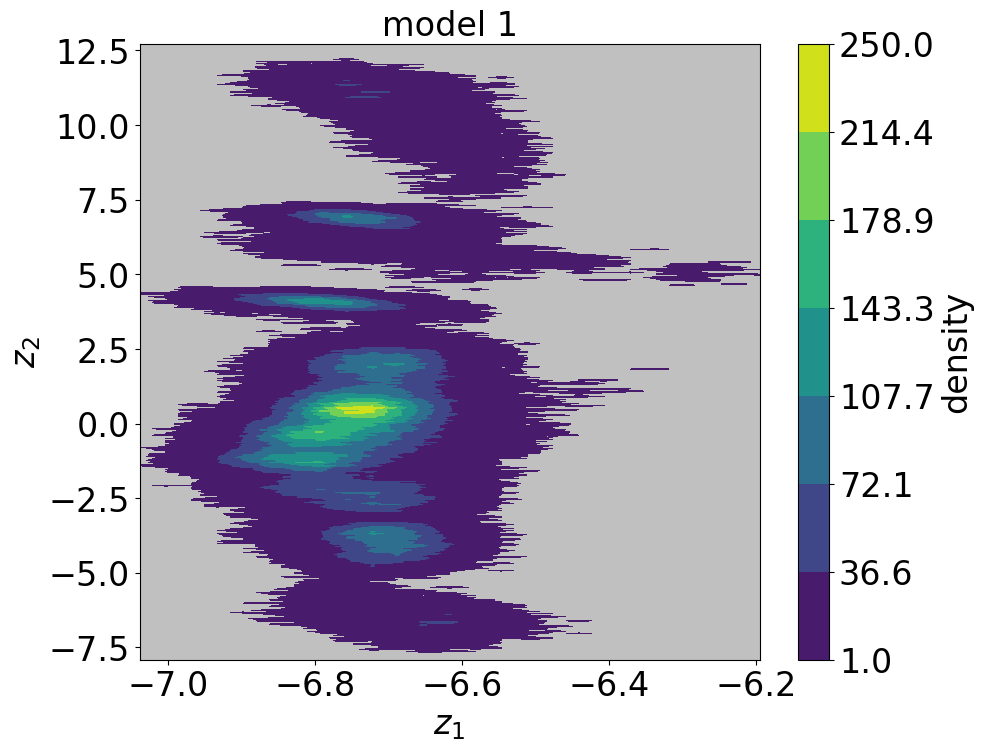

In [4]:
plot_F_fixedrange(z1, 'model 1', n1 = 25, n2 = 8)

/tmp/ipykernel_9922/354959355.py:72: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=plt.cm.get_cmap('jet', k), s=1)
/tmp/ipykernel_9922/354959355.py:79: MatplotlibDeprecationWarning: The draw_all function was deprecated in Matplotlib 3.6 and will be removed two minor releases later. Use fig.draw_without_rendering() instead.
  cbar.draw_all()


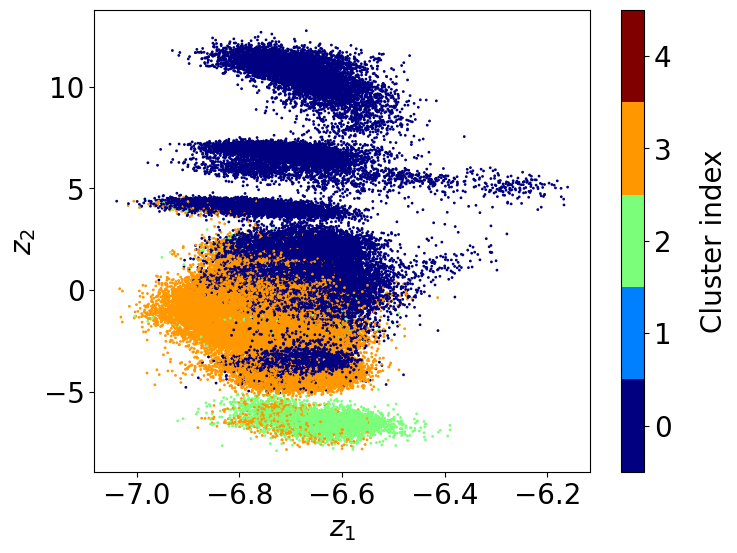

In [5]:
plot_classes(z1, yp1)

In [6]:
qy4, yp4, z4 = load('cpu4model_5_2_2000_0.3_5000')

0

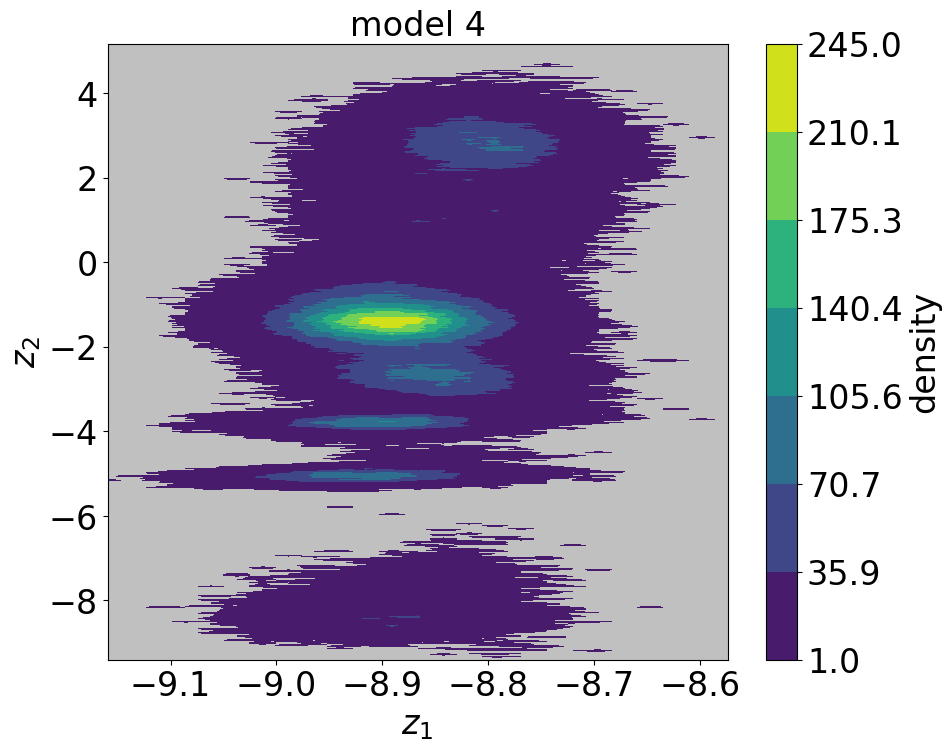

In [7]:
plot_F_fixedrange(z4, 'model 4', n1 = 25, n2 = 8)

/tmp/ipykernel_9922/354959355.py:72: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=plt.cm.get_cmap('jet', k), s=1)
/tmp/ipykernel_9922/354959355.py:79: MatplotlibDeprecationWarning: The draw_all function was deprecated in Matplotlib 3.6 and will be removed two minor releases later. Use fig.draw_without_rendering() instead.
  cbar.draw_all()


Text(0.5, 1.0, 'model 4')

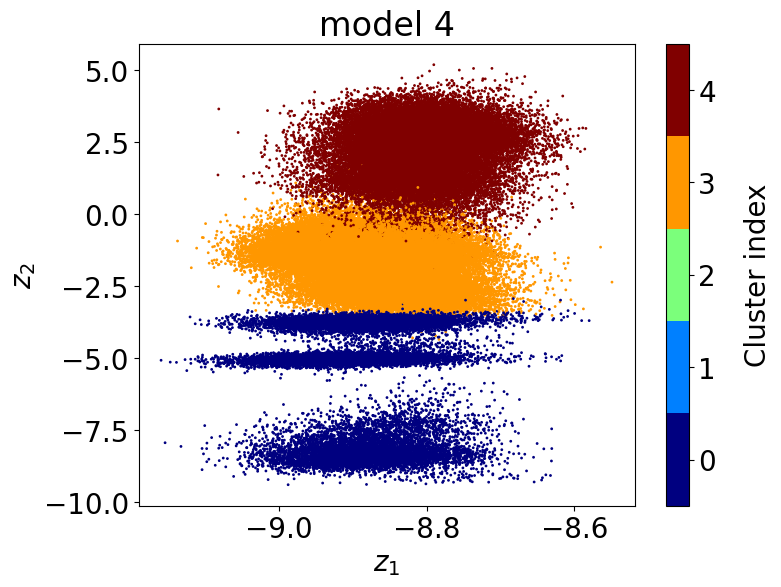

In [35]:
plot_classes(z4, yp4)
plt.title('model 4')

Text(0.5, 1.0, 'GMVAE model')

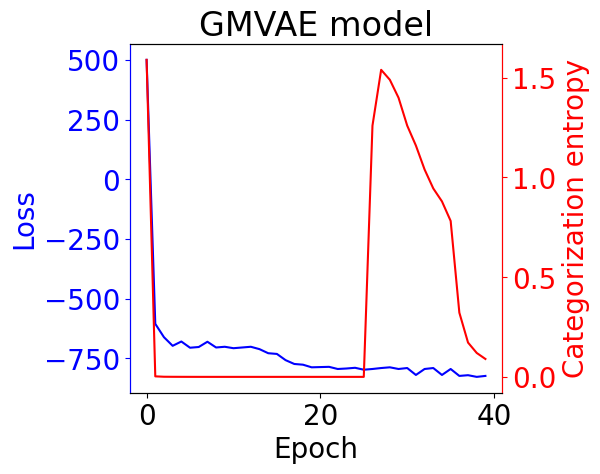

In [33]:
loss_m4 = np.loadtxt('./loss_m4')
ent_m4 = np.loadtxt('./ent_m4')
fig, ax1 = plt.subplots()
ax1.plot(loss_m4, 'b', label = "Loss")
ax1.set_ylabel("Loss", color = 'b')
ax1.set_xlabel("Epoch")
ax1.tick_params(axis='y', colors='b')
ax1.spines['left'].set_color('b')
ax1.spines['right'].set_color('r')
#ax1.legend()

ax2 = ax1.twinx() 
ax2.plot(ent_m4, 'r', label = "Categorization entropy")
ax2.set_ylabel("Categorization entropy", color = 'r')
ax2.tick_params(axis='y', colors='r')
ax2.spines['left'].set_color('b')
ax2.spines['right'].set_color('r')

#ax2.legend()
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title("GMVAE model")
#plt.show()

In [9]:
qy5, yp5, z5 = load('./cpu5model_5_2_4000_0.3_2000/')
qy6, yp6, z6 = load('./cpu6model_5_2_4000_0.3_2000/')
qy7, yp7, z7 = load('./cpu7model_5_2_4000_0.3_2000/')

/tmp/ipykernel_9922/354959355.py:72: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=plt.cm.get_cmap('jet', k), s=1)
/tmp/ipykernel_9922/354959355.py:79: MatplotlibDeprecationWarning: The draw_all function was deprecated in Matplotlib 3.6 and will be removed two minor releases later. Use fig.draw_without_rendering() instead.
  cbar.draw_all()


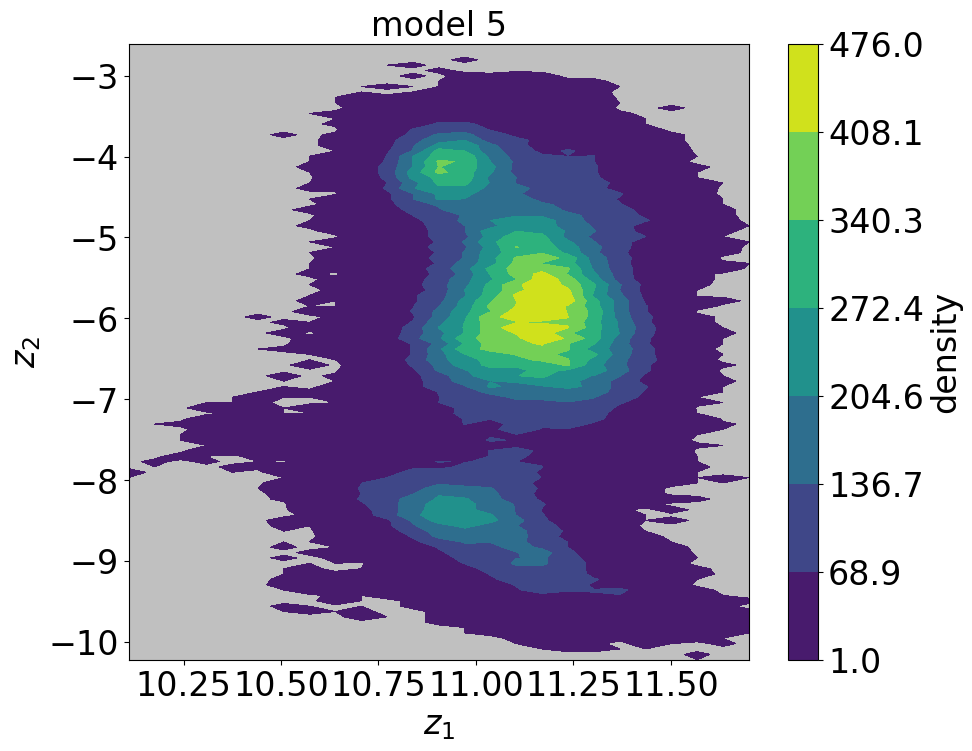

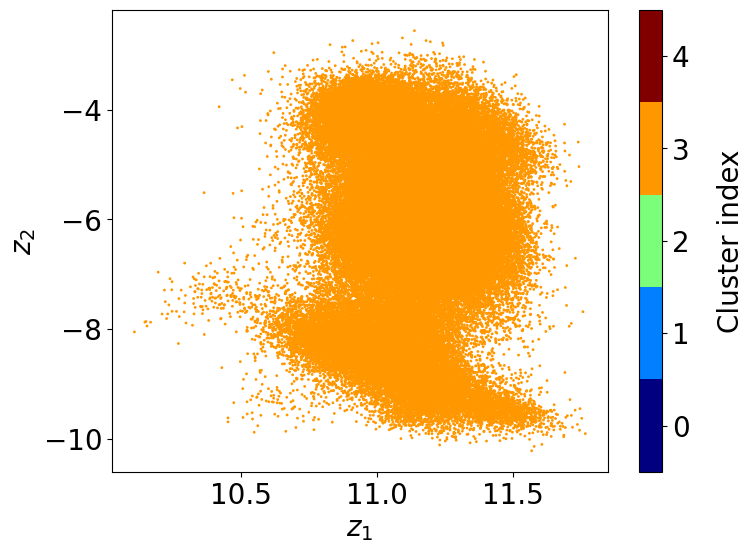

In [10]:
plot_F_fixedrange(z5, 'model 5', n1 = 25, n2 = 8)
plot_classes(z5, yp5)

/tmp/ipykernel_9922/354959355.py:72: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=plt.cm.get_cmap('jet', k), s=1)
/tmp/ipykernel_9922/354959355.py:79: MatplotlibDeprecationWarning: The draw_all function was deprecated in Matplotlib 3.6 and will be removed two minor releases later. Use fig.draw_without_rendering() instead.
  cbar.draw_all()


Text(0.5, 1.0, 'GMVAE cluster')

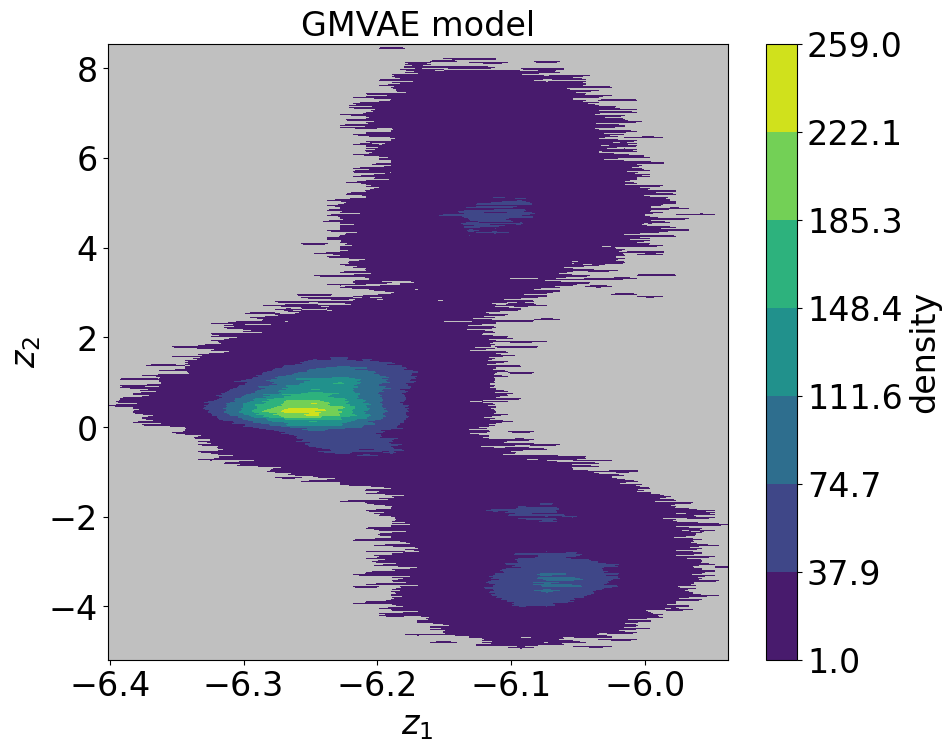

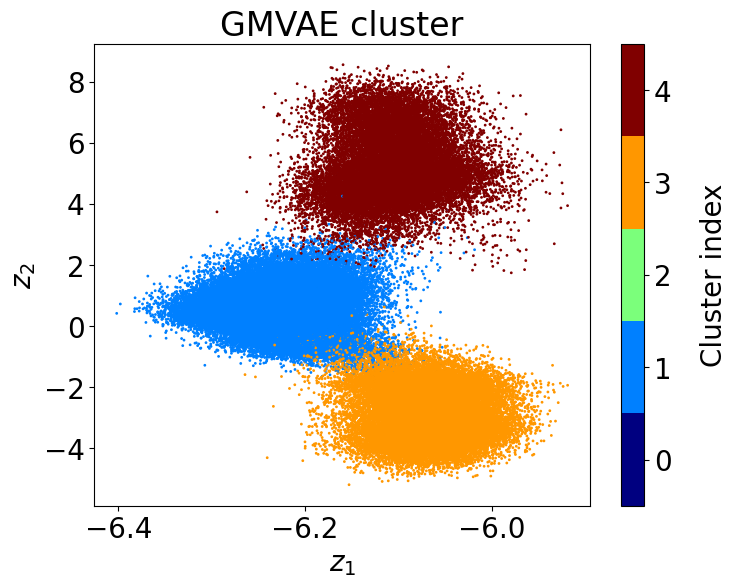

In [11]:
plot_F_fixedrange(z6, 'GMVAE model', n1 = 25, n2 = 8)
plot_classes(z6, yp6)
plt.title('GMVAE cluster')

Text(0.5, 1.0, 'GMVAE model')

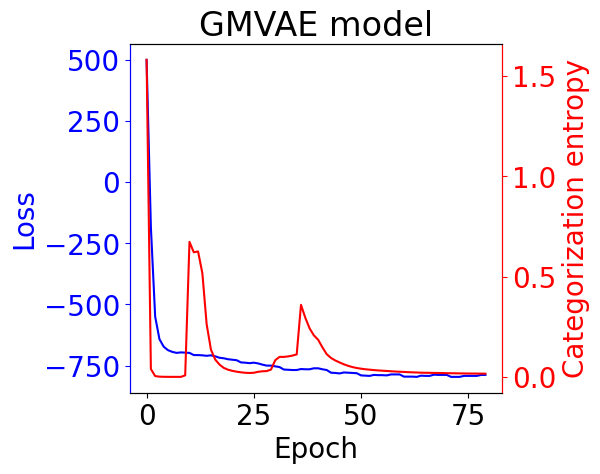

In [34]:
loss_m6 = np.loadtxt('./loss_m6')
ent_m6 = np.loadtxt('./ent_m6')
fig, ax1 = plt.subplots()
ax1.plot(loss_m6, 'b', label = "Loss")
ax1.set_ylabel("Loss", color = 'b')
ax1.set_xlabel("Epoch")
ax1.tick_params(axis='y', colors='b')
ax1.spines['left'].set_color('b')
ax1.spines['right'].set_color('r')
#ax1.legend()

ax2 = ax1.twinx() 
ax2.plot(ent_m6, 'r', label = "Categorization entropy")
ax2.set_ylabel("Categorization entropy", color = 'r')
ax2.tick_params(axis='y', colors='r')
ax2.spines['left'].set_color('b')
ax2.spines['right'].set_color('r')

#ax2.legend()
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title("GMVAE model")
#plt.show()

# Comparing with PCA

In [12]:
def read_data(file, start = 1):
    thing = []
    with open(file, 'r') as filein:
        for line in filein.readlines():
            data = line.strip().split()
            try:
                float(data[0])
                thing.append(list(map(float, data[start:])))
                
            except:
                pass
    return np.array(thing)
def get_proj(filename, N = 5):
    # N number of PCAs recorded
    proj =  read_data(filename).flatten()
    proj = proj.reshape((N, int(proj.shape[0]/N)))
    return proj


In [13]:
proj_aa5nol =  get_proj("/mnt/e/3ski/download/aa/5mM_noligand/analysis/pca_ha/proj.xvg", 20)

0

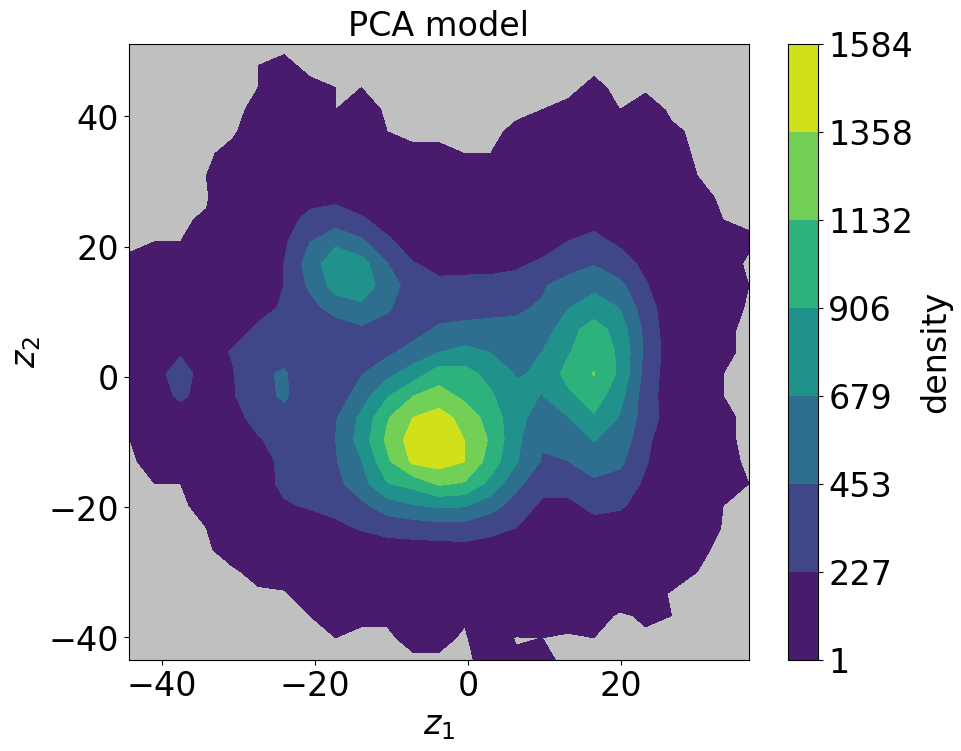

In [14]:
plot_F_fixedrange(proj_aa5nol[:2].T, 'PCA model', n1 = 25, n2 = 8)

/tmp/ipykernel_9922/354959355.py:72: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=plt.cm.get_cmap('jet', k), s=1)
/tmp/ipykernel_9922/354959355.py:79: MatplotlibDeprecationWarning: The draw_all function was deprecated in Matplotlib 3.6 and will be removed two minor releases later. Use fig.draw_without_rendering() instead.
  cbar.draw_all()


Text(0.5, 1.0, 'model 4 on PCA model')

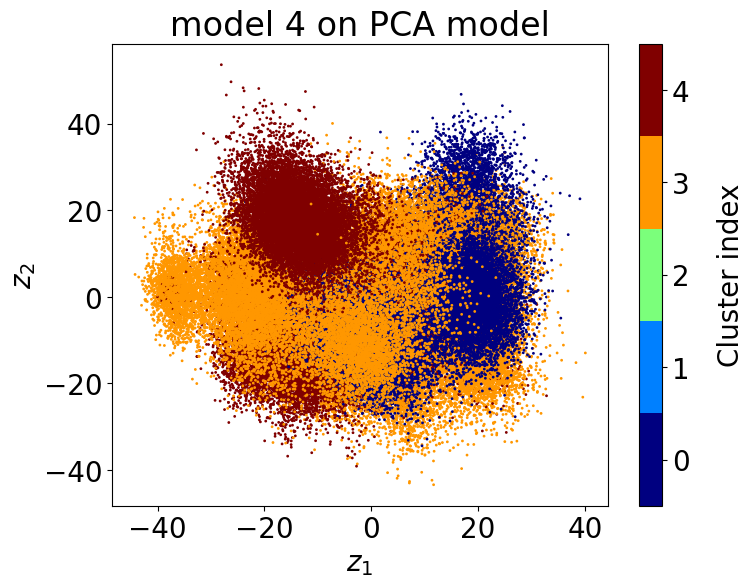

In [16]:
plot_classes(proj_aa5nol[:2].T, yp4)
plt.title("model 4 on PCA model")

/tmp/ipykernel_9922/354959355.py:72: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=plt.cm.get_cmap('jet', k), s=1)
/tmp/ipykernel_9922/354959355.py:79: MatplotlibDeprecationWarning: The draw_all function was deprecated in Matplotlib 3.6 and will be removed two minor releases later. Use fig.draw_without_rendering() instead.
  cbar.draw_all()


Text(0.5, 1.0, 'GMVAE clusters on PCA model')

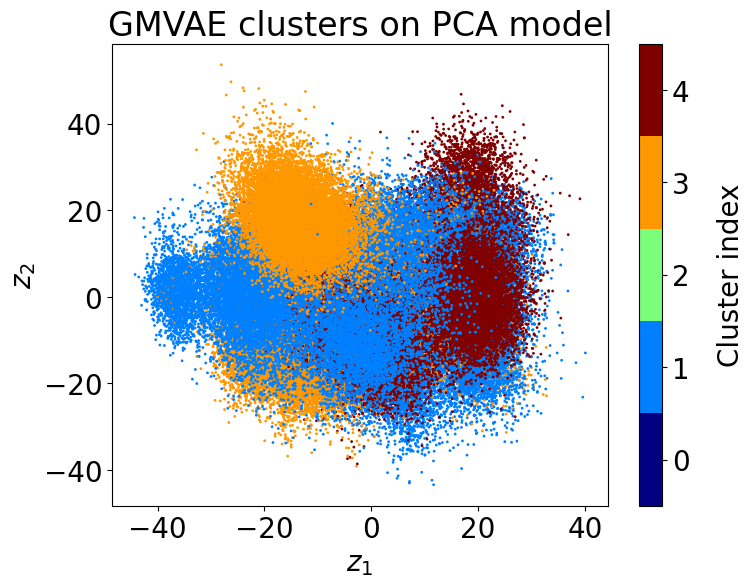

In [15]:
plot_classes(proj_aa5nol[:2].T, yp6)
plt.title("GMVAE clusters on PCA model")

# Restore the everage structure

In [15]:
import mdtraj as md

In [16]:
trj = md.load("/mnt/e/3ski/download/aa/5mM_noligand/analysis/nonwater_fit.xtc", top = "/mnt/e/3ski/download/aa/5mM_noligand/onlyion5.gro")

In [23]:
newtrj = trj[:len(np.unique(yp6))]

In [36]:
# select frames and average the coordinates and write a new trajectory
index = 0
for i in (3,1,4):
    frames = np.where(yp6 == i)[0]
    xyz = trj[frames].xyz.mean(axis = 0)
    newtrj.xyz[index] = xyz
    index += 1
    

In [37]:
newtrj.save_xtc('cluster.xtc')

/tmp/ipykernel_9922/354959355.py:72: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=plt.cm.get_cmap('jet', k), s=1)
/tmp/ipykernel_9922/354959355.py:79: MatplotlibDeprecationWarning: The draw_all function was deprecated in Matplotlib 3.6 and will be removed two minor releases later. Use fig.draw_without_rendering() instead.
  cbar.draw_all()


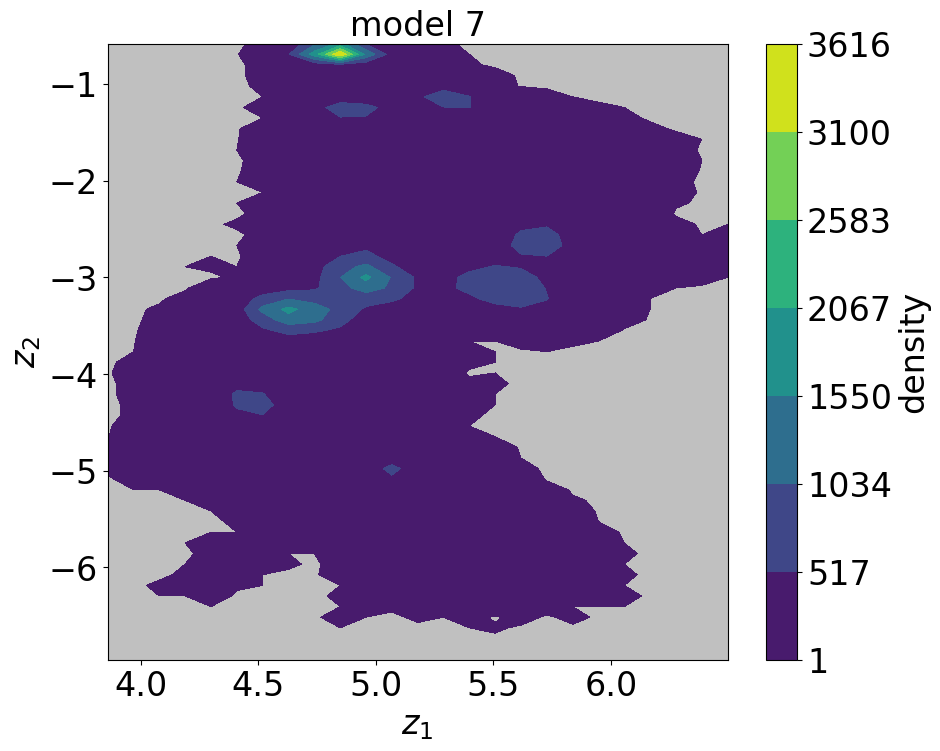

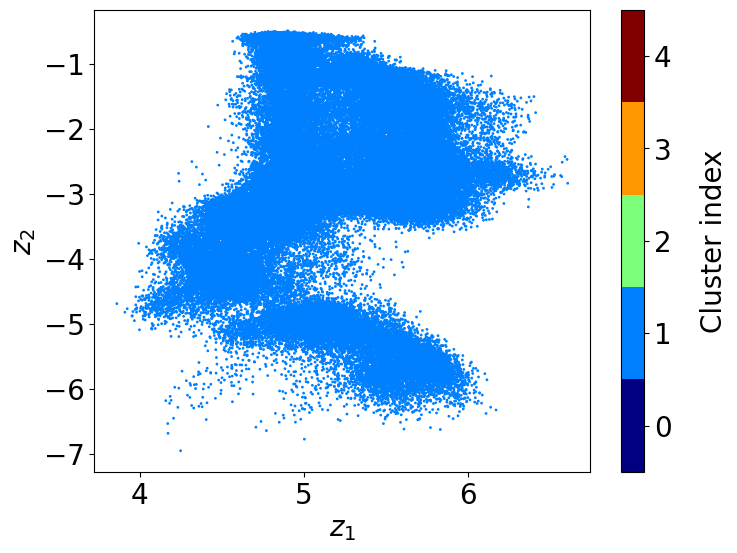

In [17]:
plot_F_fixedrange(z7, 'model 7', n1 = 25, n2 = 8)
plot_classes(z7, yp7)

In [18]:
qy8, yp8, z8 = load('./cpu8model_5_2_3000_0.1_5000/')
qy9, yp9, z9 = load('./cpu9model_5_2_3000_0.05_5000/')
qy10, yp10, z10 = load('./cpu10model_5_2_3000_0.3_5000/')
qy11, yp11, z11 = load('./cpu11model_5_2_3000_0.2_5000/')

/tmp/ipykernel_9922/354959355.py:72: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=plt.cm.get_cmap('jet', k), s=1)
/tmp/ipykernel_9922/354959355.py:79: MatplotlibDeprecationWarning: The draw_all function was deprecated in Matplotlib 3.6 and will be removed two minor releases later. Use fig.draw_without_rendering() instead.
  cbar.draw_all()


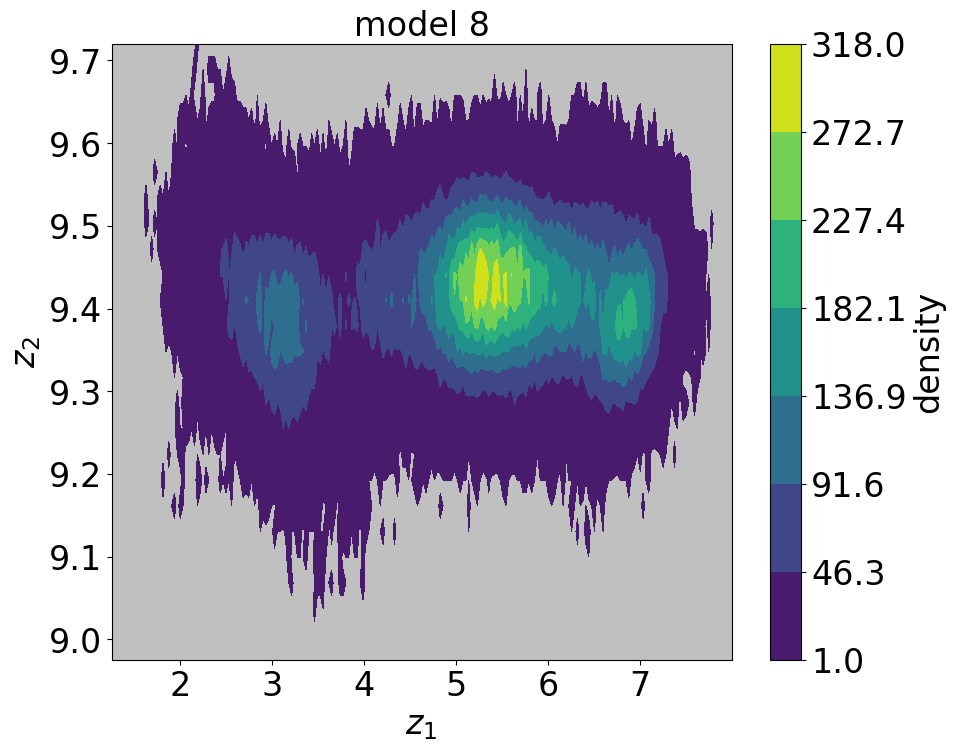

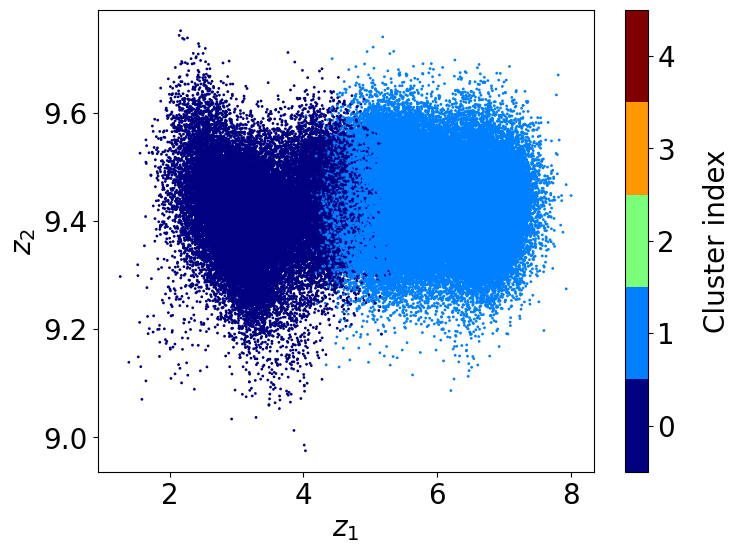

In [19]:
plot_F_fixedrange(z8, 'model 8', n1 = 25, n2 = 8)
plot_classes(z8, yp8)

/tmp/ipykernel_9922/354959355.py:72: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=plt.cm.get_cmap('jet', k), s=1)
/tmp/ipykernel_9922/354959355.py:79: MatplotlibDeprecationWarning: The draw_all function was deprecated in Matplotlib 3.6 and will be removed two minor releases later. Use fig.draw_without_rendering() instead.
  cbar.draw_all()


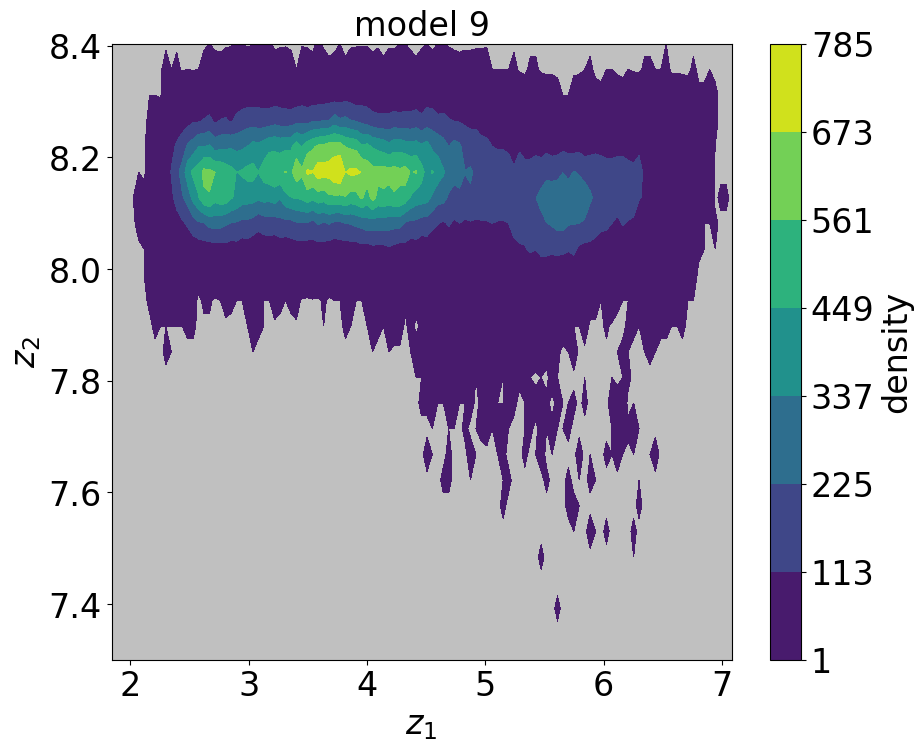

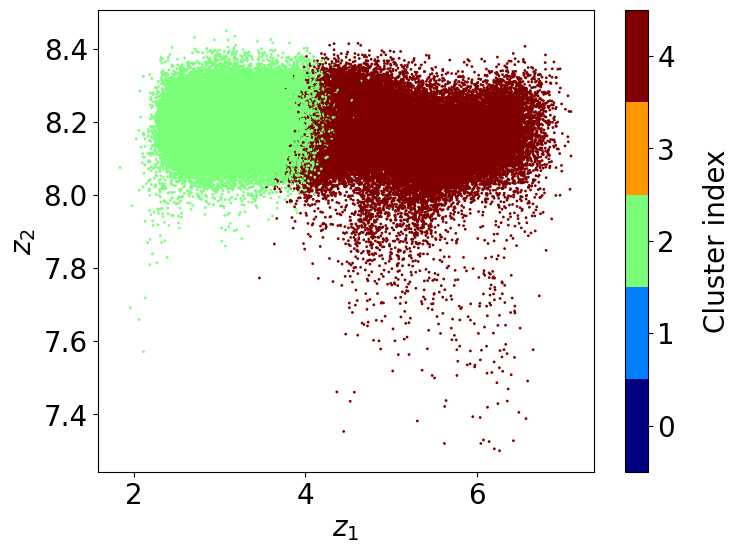

In [20]:
plot_F_fixedrange(z9, 'model 9', n1 = 25, n2 = 8)
plot_classes(z9, yp9)

/tmp/ipykernel_9922/354959355.py:72: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=plt.cm.get_cmap('jet', k), s=1)
/tmp/ipykernel_9922/354959355.py:79: MatplotlibDeprecationWarning: The draw_all function was deprecated in Matplotlib 3.6 and will be removed two minor releases later. Use fig.draw_without_rendering() instead.
  cbar.draw_all()


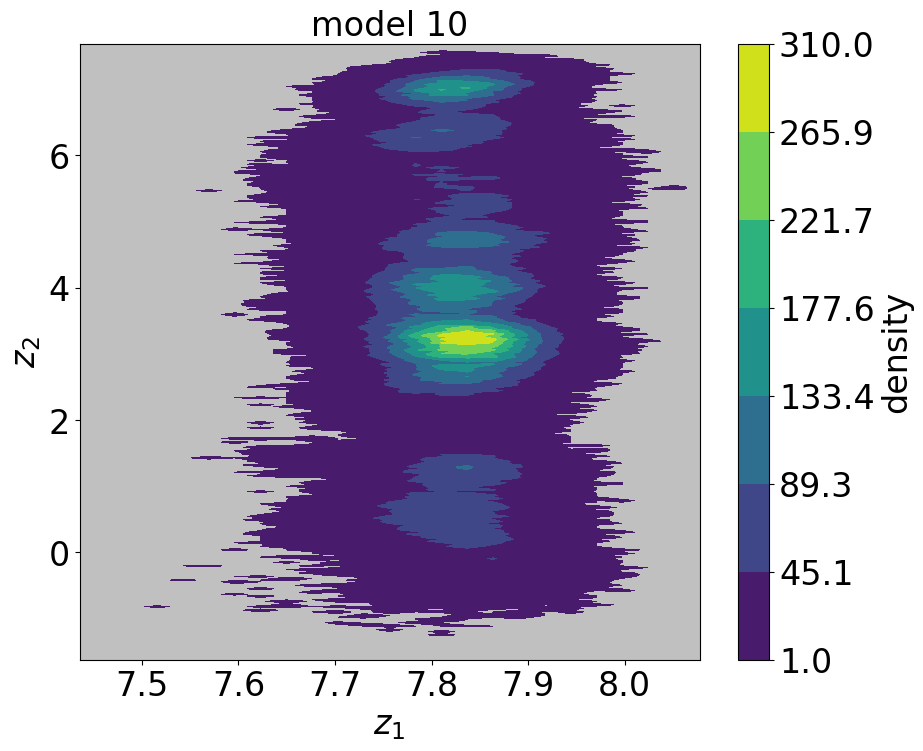

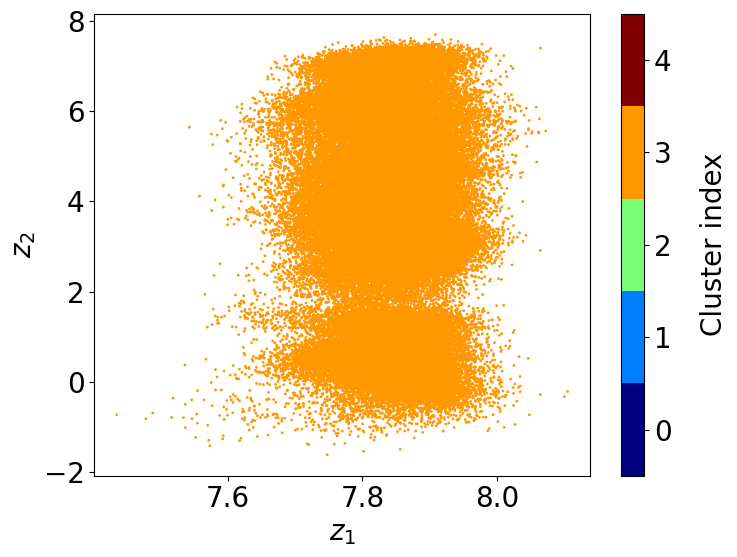

In [21]:
plot_F_fixedrange(z10, 'model 10', n1 = 25, n2 = 8)
plot_classes(z10, yp10)

/tmp/ipykernel_9922/354959355.py:72: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=plt.cm.get_cmap('jet', k), s=1)
/tmp/ipykernel_9922/354959355.py:79: MatplotlibDeprecationWarning: The draw_all function was deprecated in Matplotlib 3.6 and will be removed two minor releases later. Use fig.draw_without_rendering() instead.
  cbar.draw_all()


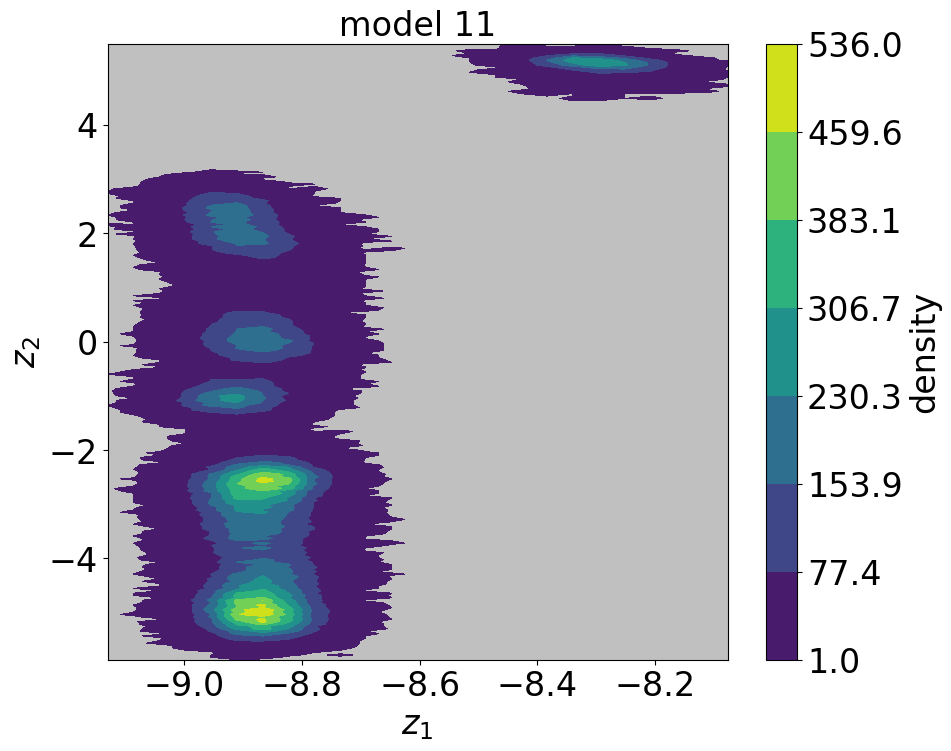

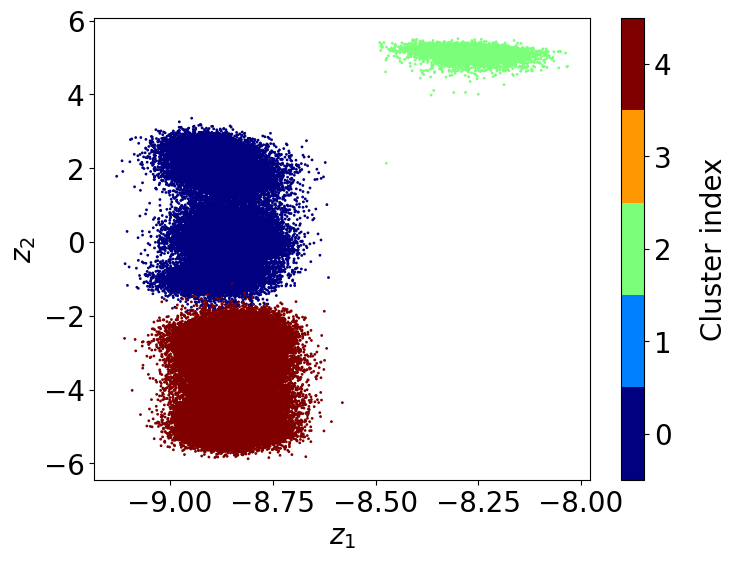

In [22]:
plot_F_fixedrange(z11, 'model 11', n1 = 25, n2 = 8)
plot_classes(z11, yp11)